## 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as metrics

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances


from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
data1 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\9.Recommendation system\Project week\phone_user_review_file_1.csv", encoding='latin')
data2 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\9.Recommendation system\Project week\phone_user_review_file_2.csv", encoding='latin')
data3 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\9.Recommendation system\Project week\phone_user_review_file_3.csv", encoding='latin')
data4 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\9.Recommendation system\Project week\phone_user_review_file_4.csv", encoding='latin')
data5 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\9.Recommendation system\Project week\phone_user_review_file_5.csv", encoding='latin')
data6 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\9.Recommendation system\Project week\phone_user_review_file_6.csv", encoding='latin')

## • Merge the provided CSVs into one data-frame.

In [3]:
data = pd.concat([data1,data2,data3,data4,data5,data6 ]).drop_duplicates()

In [4]:
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


## • Check a few observations and shape of the data-frame.

In [5]:
data.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [6]:
print(data.columns)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')


In [7]:
row , column = data.shape
print('The  dataset contains', row, 'rows and', column, 'columns')

The  dataset contains 1408721 rows and 11 columns


In [8]:
data.size

15495931

## • Round off scores to the nearest integers.

In [9]:
data.score = round(data.score)

## • Check for missing values. Impute the missing values if there is any.

In [10]:
data.isnull().sum().any()

True

In [11]:
data.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63093
score_max    63093
extract      19014
author       61817
product          1
dtype: int64

observation: there are lot of missing values for column score , score_max , extract , author ,product 

In [12]:
# Original dataframe size
Original_size = data.size

# drop dataframe
data.dropna(inplace=True)

# New dataframe size
New_size=data.size

print("> Original:",Original_size,"vs","New:",New_size)

# Data drop impact analysis

Data_lost=100*((Original_size-New_size)/Original_size)
print("> Percentage of data lost",Data_lost,"%")
if Data_lost<=5:
    print("\n> Not much data has been lost,dropping data was a good option")
else:
    print("\n> Considerable data has been lost,dropping data was not a good option. We need to impute data") 

> Original: 15495931 vs New: 13985961
> Percentage of data lost 9.74429997139249 %

> Considerable data has been lost,dropping data was not a good option. We need to impute data


## • Check for duplicate values and remove them if there is any.

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
duplicate = data[data.duplicated()]

In [15]:
duplicate

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


we can observe there is no dublicate value left 

## • Keep only 1000000 data samples. Use random state=612.

In [16]:
data = data.sample(n=1000000,random_state=612).reset_index(drop=True)

In [17]:
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/lenovo-vibe-k5/,7/25/2016,en,in,Amazon,amazon.in,10.0,10.0,Good product in this price...,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
1,/cellphones/samsung-galaxy-s6/,11/10/2016,es,es,Samsung,samsung.com,8.0,10.0,"En general me gusta mucho mi nuevo S6, el reco...",Evyta,Samsung Galaxy S6
2,/cellphones/sony-ericsson-k810i/,1/3/2010,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð½ÐµÑÐ¼Ð¾ÑÑÑ Ð½Ð° Ð½ÐµÐ´Ð¾ÑÑÐ°ÑÐºÐ¸ Ð² ...,VanRaZor,Sony Ericsson K810i
3,/cellphones/sony-xperia-z2/,7/19/2014,ru,ua,Hotline.ua,hotline.ua,6.0,10.0,ÐÑÑÑ ÑÐ¶Ðµ ÑÐ°Ð·Ð²ÐµÑÐ½ÑÑÑÐ¹ Ð¾ÑÐ·Ñ...,ruga,Sony Xperia Z2 (Black)
4,/cellphones/samsung-galaxy-s7-edge/,10/21/2016,de,de,Otto.de,otto.de,10.0,10.0,Ein Wahnsinns Handy! Macht richtig schÃ¶ne Bil...,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."


In [18]:
data.shape

(1000000, 11)

## • Drop irrelevant features. Keep features like Author, Product, and Score.

In [19]:
data.drop(['phone_url', 'extract', 'domain', 'date','lang', 'country', 'source' , 'score_max'], axis = 1,inplace = True)

In [20]:
data.head()

,score,author,product
0,10.0,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
1,8.0,Evyta,Samsung Galaxy S6
2,8.0,VanRaZor,Sony Ericsson K810i
3,6.0,ruga,Sony Xperia Z2 (Black)
4,10.0,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."


## 2. Identify the most rated features.

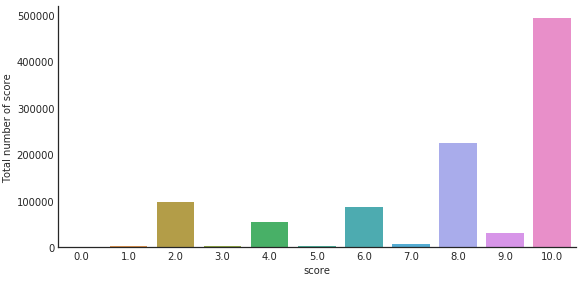

In [21]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("score", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of score") 

In [22]:
data.score.unique()

array([10.,  8.,  6.,  2.,  4.,  7.,  9.,  1.,  5.,  3.,  0.])

In [23]:
dxfhbj

NameError: name 'dxfhbj' is not defined

In [24]:
#data.groupby(data.score).count()
most_rated_product =pd.DataFrame (data.groupby('product')['score'].count().sort_values(ascending = False).reset_index())
most_rated_product.head(10)

,product,score
0,"Lenovo Vibe K4 Note (White,16GB)",4109
1,"Lenovo Vibe K4 Note (Black, 16GB)",3451
2,"OnePlus 3 (Graphite, 64 GB)",3212
3,"OnePlus 3 (Soft Gold, 64 GB)",2798
4,Huawei P8lite zwart / 16 GB,2121
5,"Lenovo Vibe K5 (Gold, VoLTE update)",2011
6,Samsung Galaxy S6 zwart / 32 GB,1837
7,"Lenovo Vibe K5 (Grey, VoLTE update)",1680
8,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",1529
9,Samsung Galaxy J3 (8GB),1449


observation: Lenovo ibe K4 Note(White , 16 GB) is the most rated feature :4109
It seems Lenovo Vibe (K4 note) & Oneplus (3) are quite famous in the market 

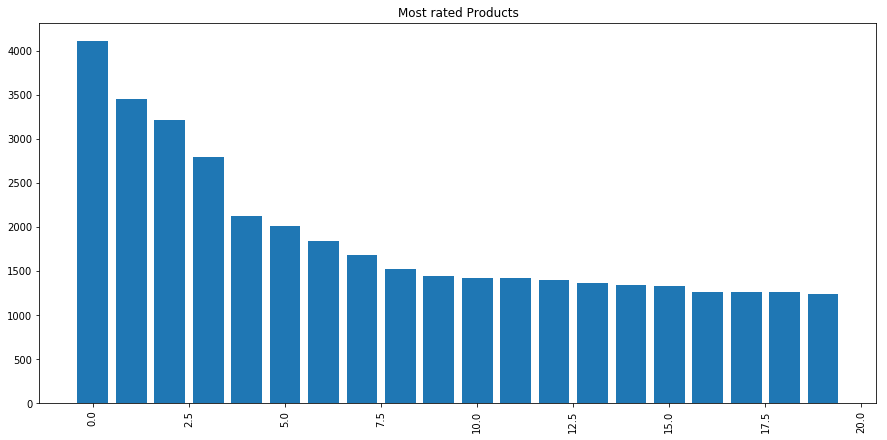

In [36]:
# 20 Most rated Products
plt.figure(figsize=(15,7))
plt.bar(most_rated_product.index[0:20],most_rated_product['score'].head(20))
plt.xticks(rotation = 90)
plt.title('Most rated Products')
plt.show()

### • Identify the users with most number of reviews.

In [43]:
most_rated_user = pd.DataFrame(data.groupby('author')['score'].count().sort_values(ascending = False).reset_index())
most_rated_user.head(10)

,author,score
0,Amazon Customer,60408
1,Cliente Amazon,15051
2,e-bit,6651
3,Client d'Amazon,6087
4,Amazon Kunde,3683
5,Anonymous,2096
6,einer Kundin,2065
7,einem Kunden,1452
8,unknown,1350
9,Anonymous,1161


### • Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [45]:
Data = data.groupby(['product' , 'author'])['score'].count().sort_values(ascending = False)

In [46]:
Data = pd.DataFrame(Data).reset_index()
Data.head()

,product,author,score
0,"Lenovo Vibe K4 Note (White,16GB)",Amazon Customer,2427
1,"Lenovo Vibe K4 Note (Black, 16GB)",Amazon Customer,1985
2,"OnePlus 3 (Graphite, 64 GB)",Amazon Customer,1431
3,"OnePlus 3 (Soft Gold, 64 GB)",Amazon Customer,1347
4,"Lenovo Vibe K5 (Gold, VoLTE update)",Amazon Customer,1253


In [47]:
df = Data[Data['score']>50]

In [48]:
df.head()

,product,author,score
0,"Lenovo Vibe K4 Note (White,16GB)",Amazon Customer,2427
1,"Lenovo Vibe K4 Note (Black, 16GB)",Amazon Customer,1985
2,"OnePlus 3 (Graphite, 64 GB)",Amazon Customer,1431
3,"OnePlus 3 (Soft Gold, 64 GB)",Amazon Customer,1347
4,"Lenovo Vibe K5 (Gold, VoLTE update)",Amazon Customer,1253


In [49]:
row , column = df.shape
print('The new dataset contains having more than 50 ratings and users who have given more than 50 ratings', row, 'rows and', column, 'columns')

The new dataset contains having more than 50 ratings and users who have given more than 50 ratings 229 rows and 3 columns


## 3. Build a popularity based model and recommend top 5 mobile phones.

In [57]:
top5 = pd.DataFrame(data.groupby('product')['score'].mean().sort_values(ascending = False))
top5.head()

,score
product,
æ©æç½æ C168i,10.0
Nokia C5 Sim Free Mobile Phone - Warm Grey,10.0
Nokia N95 8GB Black Sim Free Unlocked Mobile Phone,10.0
"Nokia N95 160 MB US Version Unlocked Cell Phone w/ GPS, Wi-Fi, 5MP Camera",10.0
Nokia N95 - Warm graphite Smartphone,10.0


These are mobiles with highest rating

To make it more meaningful to the user, one can add number of users who can given rating

##### Popularity Based Model 

In [58]:
top5['rating_count'] = pd.DataFrame(data.groupby('product')['score'].count().sort_values(ascending = False))

In [59]:
top5 = top5.sort_values(by = ['score','rating_count'],ascending = False )
top5.head()

,score,rating_count
product,,
Samsung Galaxy Note5,10.0,156
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,142
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,137
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,136
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,129


Above we can see the top 5 mobile phones with the highest score and rating . 

<Figure size 720x720 with 0 Axes>

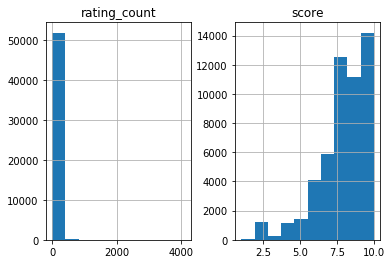

In [60]:
plt.figure(figsize = (10,10))
top5 .hist(bins = 10);

observation : we can observe that the dataset contains more integer  rating rather then float  type rating 

<Figure size 576x432 with 0 Axes>

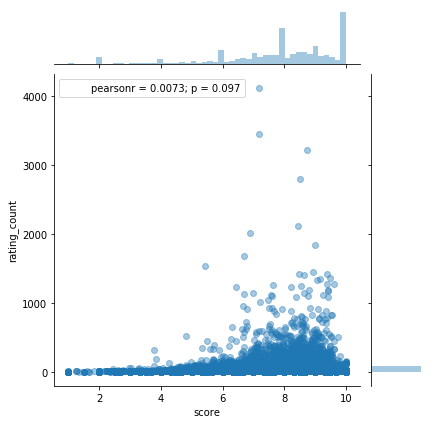

In [61]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'score' , y = 'rating_count' , data = top5, alpha = 0.4);

observation : The graph shows that in general the phone with higher score have more number of ratings ,
compared with phones that have lower average ratins 

### 4. a)Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues).                                                                                                                                                                                                                                                                                                                                                                           

In [62]:
data.head(2)

,score,author,product
0,10.0,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
1,8.0,Evyta,Samsung Galaxy S6


In [63]:
data = data.sample(n=5000,random_state=234)

In [64]:
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise.model_selection import train_test_split

In [65]:
reader = Reader(rating_scale=(1, 10))

Creating data with only required features i.e. user, mobile and rating

In [66]:
new_data = Dataset.load_from_df(data[['author', 'product', 'score']], reader)

In [67]:
new_data.df.head()

,author,product,score
441101,thebo,"Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchsc...",8.0
589804,Cliente Amazon,Meizu M2 2 + 16GB 4G LTE Dual Sim Android 5.1 ...,2.0
12733,Fede+Cry,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,10.0
358608,brcdive,Nokia Lumia 640 XL Windows 8.1 Smartphone with...,10.0
772132,ankudubey,Microsoft Lumia 640 LTE,10.0


In [68]:
trainset, testset = train_test_split(new_data, test_size=.25,random_state=123)

In [71]:
trainset.n_ratings

3750

In [72]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 4.0)],
             3: [(3, 6.0)],
             4: [(4, 8.0)],
             5: [(5, 2.0)],
             6: [(6, 8.0)],
             7: [(7, 8.0)],
             8: [(8, 10.0)],
             9: [(9, 5.0)],
             10: [(10, 10.0),
              (163, 2.0),
              (605, 10.0),
              (631, 2.0),
              (1117, 10.0),
              (1288, 8.0),
              (1376, 6.0),
              (1722, 8.0),
              (1820, 10.0),
              (1852, 8.0),
              (2034, 6.0),
              (2044, 10.0),
              (88, 10.0),
              (2644, 2.0),
              (2668, 8.0),
              (2762, 10.0),
              (2805, 10.0),
              (2938, 10.0)],
             11: [(11, 6.0)],
             12: [(12, 10.0)],
             13: [(13, 8.0)],
             14: [(14, 10.0)],
             15: [(15, 8.0)],
             16: [(16, 10.0)],
             17: [(17, 

In [73]:
algo = SVD()
algo.fit(trainset)

In [74]:
testset[0]

('Stox', 'Samsung Galaxy S7 SM-G930F Or 32 Go', 10.0)

In [75]:
predictions = algo.test(testset)

predictions

[Prediction(uid='Stox', iid='Samsung Galaxy S7 SM-G930F Or 32 Go', r_ui=10.0, est=8.0336, details={'was_impossible': False}),
 Prediction(uid='Shreyas Ghogale', iid='HTC Desire 626G+ (8GB,White Birch)', r_ui=8.0, est=7.519881527966452, details={'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero [Italia]', r_ui=8.0, est=8.074897202094196, details={'was_impossible': False}),
 Prediction(uid='teoretik.8', iid='Nokia X1-01', r_ui=4.0, est=7.5307924384744975, details={'was_impossible': False}),
 Prediction(uid='?????????????????\x80', iid='Samsung C3322 Duos', r_ui=10.0, est=8.0336, details={'was_impossible': False}),
 Prediction(uid='Luca Girelli', iid='Samsung Galaxy Ace II Smartphone, Bianco [Italia]', r_ui=6.0, est=8.0336, details={'was_impossible': False}),
 Prediction(uid='Ricardo Vicentino', iid='Samsung Smartphone Samsung Galaxy S4 Mini Duos Dual Chip Desbloqueado Android...', r_ui=10.0, est=8.332460423654153, details={'w

In [76]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [77]:
top_n = get_top_n(predictions, n=10)

top_n

defaultdict(list,
            {'Stox': [('Samsung Galaxy S7 SM-G930F Or 32 Go', 8.0336)],
             'Shreyas Ghogale': [('HTC Desire 626G+ (8GB,White Birch)',
               7.519881527966452)],
             'Cliente Amazon': [('Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia]',
               8.745892693697062),
              ('Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Argento',
               8.575124177632036),
              ('Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM de 2 GB, memoria interna de 16 GB, cÃ¡mara de 8 MP, Android 6), blanco',
               8.168663808672132),
              ('BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cÃ¡mara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial',
               8.108479433180142),
              ('Samsung G920 Galaxy S6 Smartphone, 3

In [78]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Stox ['Samsung Galaxy S7 SM-G930F Or 32 Go']
Shreyas Ghogale ['HTC Desire 626G+ (8GB,White Birch)']
Cliente Amazon ['Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia]', 'Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Argento', 'Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM de 2 GB, memoria interna de 16 GB, cÃ¡mara de 8 MP, Android 6), blanco', 'BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cÃ¡mara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial', 'Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero [Italia]', 'Doogee X5 Max Pro - Smartphone mÃ³vil libre 4G (Android 6.0, Pantalla 5.0", Quad Core, 16GB ROM, 2GB RAM, Dual SIM, Sensor de huellas dactilares, E-Compass), Blanco', 'BlackBerry Q5 bianco - Smartphone', 'Huawei P9 Smartphone, LTE, Display 5.2" FHD, Memoria Interna 32 GB, 3 GB RAM, Processor

SARAHPRADO ['Samsung B5722']
J. Reynolds ['Motorola Moto E (2nd Generation) Locked Cellphone, Black']
Loop1773 ['Samsung Galaxy Note II']
Stefano Saitta ['Alcatel Onetouch Pop C7 Smartphone, 4 GB, Dual SIM, Nero [Italia]']
toddylee ['Siemens MC60']
Arodate ['Honor 7 Smartphone dÃ©bloquÃ© 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir']
Belov Antony ['OPPO Find 5 16Gb']
R. MÃ¼ller ['HTC One SV Smartphone (10,9 cm (4,3 Zoll) Touchscreen, Dual-core, 1,2GHz, 1GB RAM, 8GB interner Speicher, 5 Megapixel Kamera, Android 4.0) blau']
Martin Ha. ['Cubot NOTE S Quad Core 5,5" Zoll 3G-Smartphone Dual SIM Handy ohne Vertrag 2GB+16GB Android 5,1 Dual SIM GPS WIFI Bluetooth Dual Kamers 1,3 GHz MT6580 Schwarz']
Crielesi ['Nokia 1616 TÃ©lÃ©phone portable GSM Noir']
ST ['Samsung Galaxy Nexus 16GB Sim Free Smartphone']
Thommy ['Sony Ericsson Naite Handy (TFT-Farbdisplay, 2 MP Kamera, GSM) vapour silver']
joulietemach ['Nokia X3']
david.fisher ['Samsung SGH E730']
2006EE

Let's first subset data where a user has rated/reviewed 500 or above times.
This will ensure ratings to be more credible

## b)Build a collaborative filtering model using kNNWithMeans from surprise.     
1)user-based                                                    

In [80]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algou = KNNWithMeans(k=50, sim_options={ 'user_based': True})
algou.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


#### 2)item-based model.

In [81]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algoi = KNNWithMeans(k=50, sim_options={ 'user_based': False})
algoi.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


## 6. Predict score (average rating) for test users.

In [82]:
# run the trained model against the testset for user-based model.
test_pred_u=algou.test(testset)
test_pred_u

[Prediction(uid='Stox', iid='Samsung Galaxy S7 SM-G930F Or 32 Go', r_ui=10.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Shreyas Ghogale', iid='HTC Desire 626G+ (8GB,White Birch)', r_ui=8.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Cliente Amazon', iid='Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero [Italia]', r_ui=8.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='teoretik.8', iid='Nokia X1-01', r_ui=4.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='?????????????????\x80', iid='Samsung C3322 Duos', r_ui=10.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Luca Girelli', iid='Samsung Galaxy Ace II Smartphone, Bianco [Italia]', r_ui=6.0, est=8.0336, details={'was_impossible': True, 'reason

In [83]:
# run the trained model against the testset for Item-based model.
test_pred_i=algoi.test(testset)
test_pred_i

[Prediction(uid='Stox', iid='Samsung Galaxy S7 SM-G930F Or 32 Go', r_ui=10.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Shreyas Ghogale', iid='HTC Desire 626G+ (8GB,White Birch)', r_ui=8.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Cliente Amazon', iid='Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero [Italia]', r_ui=8.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='teoretik.8', iid='Nokia X1-01', r_ui=4.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='?????????????????\x80', iid='Samsung C3322 Duos', r_ui=10.0, est=8.0336, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Luca Girelli', iid='Samsung Galaxy Ace II Smartphone, Bianco [Italia]', r_ui=6.0, est=8.0336, details={'was_impossible': True, 'reason

#### 5. Evaluate the collaborative model. Print RMSE value.

In [84]:
# compute RMSE
print("SVN Model : Test Set")
accuracy.rmse(predictions)

SVN Model : Test Set
RMSE: 2.6993


2.6992825410531522

In [85]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_u, verbose=True)

User-based Model : Test Set
RMSE: 2.7180


2.718012306240014

In [86]:
# get RMSE
print("item-based Model : Test Set")
accuracy.rmse(test_pred_i, verbose=True)

item-based Model : Test Set
RMSE: 2.7590


2.7590040806155898

## 7. Report your findings and inferences.

*Test RMSE for Tuned SVD model is 2.6992825410531522

*Test RMSE for Tuned KNNWithMeans User-Based model is 2.718012306240014

*Test RMSE for Tuned KNNWithMeans Item-Based model is 2.7590040806155898

*SVD is performing best here, second KNNWithMeans User-Based, third KNNWithMeans Item-based

*Final Model selcted is the SVD tuned model

*Average prediction of users are close to the real average predictions. RMSE is liitle higher due to the rating scale (1,10)

*The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user. It gives the same recommendation for every users.

*User-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. It gives the different recommendation for different users based on its nearest neighbou users.

*Item-based Collaborative Filtering is a personalised recommender system, the recommendations are based similar items. It gives the different recommendation for different users based on the items they have rated.

## 8. Try and recommend top 5 products for test users.

##### Top 5 item based recommendations of mobile to an user say Amazon Customer for SVD based model 

In [94]:
pred_sv = pd.DataFrame(predictions)
pred_sv[pred_sv['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head()

,iid,r_ui,est
12,BlackBerry Z10 16Gb White WiFi Touchscreen Unl...,10.0,8.012750
284,"HTC One M9+ Plus 32GB Gold on Silver, 5.2"", GS...",10.0,8.012750
411,HTC myTouch Slide 4G Mobile Phone with QWERTY ...,10.0,8.012750
562,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,3.183333
658,Samsung Giorgio Armani Galaxy S I9010 Smartpho...,10.0,10.000000


##### Top 5 item based recommendations of mobile to an user say Amazon Customer for user-based model 

In [87]:
pred_uc = pd.DataFrame(test_pred_u)
pred_uc[pred_uc['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head()

,iid,r_ui,est
455,"Lenovo Vibe K4 Note (White,16GB)",10.0,6.056188
545,Samsung Galaxy Note 4 N910V 32GB Unlocked GSM ...,10.0,8.033600
456,"BlackBerry Classic, Black 16GB (Verizon Wireless)",10.0,8.033600
964,Sony Xperia M4 Aqua 16GB GSM/LTE Unlocked Cell...,10.0,7.037383
461,"LG H955 Unlocked G Flex 2 Cell Phone, 16 GB In...",10.0,8.033600


##### Top 5 item based recommendations of mobile to an user say Amazon Customer for item-based model 

In [89]:
# For Item-based model 
pred_ic = pd.DataFrame(test_pred_i)
pred_ic[pred_ic['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head()

,iid,r_ui,est
455,"Lenovo Vibe K4 Note (White,16GB)",10.0,5.98385
545,Samsung Galaxy Note 4 N910V 32GB Unlocked GSM ...,10.0,8.03360
456,"BlackBerry Classic, Black 16GB (Verizon Wireless)",10.0,8.03360
964,Sony Xperia M4 Aqua 16GB GSM/LTE Unlocked Cell...,10.0,10.00000
461,"LG H955 Unlocked G Flex 2 Cell Phone, 16 GB In...",10.0,8.03360


## 9. Try cross validation techniques to get better results.

Let's apply K-fold cross validation on Item based collaborative filtering

In [90]:
from surprise.model_selection import KFold
kf = KFold(n_splits=5)

for trainset, testset in kf.split(new_data):
    #algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False}) # already ran above
    # train and test algorithm.
    algoi.fit(trainset)
    predictions = algoi.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.7091
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.7234
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.6800
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.6579
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.7747


In [92]:
mean = (2.7091+2.7234+2.6800+2.6579+2.7747)/5
print(mean)

2.7090199999999998


Mean RMSE of K-fold cross validation of Item based collaborative filtering is 2.7090.

Best and worst model among the five gave RMSE score of 2.7091 and 2.7747.

K-fold improved the score slightly with very small deviation in scores which give more confidence in production environment.

## 10. In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation should be used when no purchasing/product history of an user is available because some recommendation is better than no recommendation.

## 11. In what business scenario you should use CF based Recommendation Systems ?

As we got to know about user's likes or dislikes about a product, Collaborative filtering based recommendation should be used, it could be mix of user based and item based recommendation.

## 12. What other possible methods can you think of which can further improve the recommendation for different users ?

In order to improve recommendations further, Hybride based recomendation & Apriori based recommendation i.e. Market Basket Analysis can be used.

Also there is a language difference ,so different models can be created for different counties/Languages.

Or we can parse the language to one common english language